## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from tqdm import tqdm
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.callbacks import EarlyStopping

In [3]:
from google.colab import drive
drive.mount(('/content/drive'))

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/drive/My Drive/AIML_Project/Dog_breed/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'dog-breed-identification.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

There is only one zip file and it has been extracted

Repeat the same step for sample_submission.csv.zip

In [0]:
labels = pd.read_csv('/content/drive/My Drive/dog_breed/dog-breed-identification/labels.csv')

Repeat the same step for labels.csv.zip

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
labels_df = pd.read_csv('/content/labels.csv')

In [8]:
labels_df.head(2)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo


### Print the count of each category of Dogs given in the dataset



In [9]:
labels_df['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
brabancon_griffon        67
komondor                 67
golden_retriever         67
briard                   66
eskimo_dog               66
Name: breed, Length: 120, dtype: int64

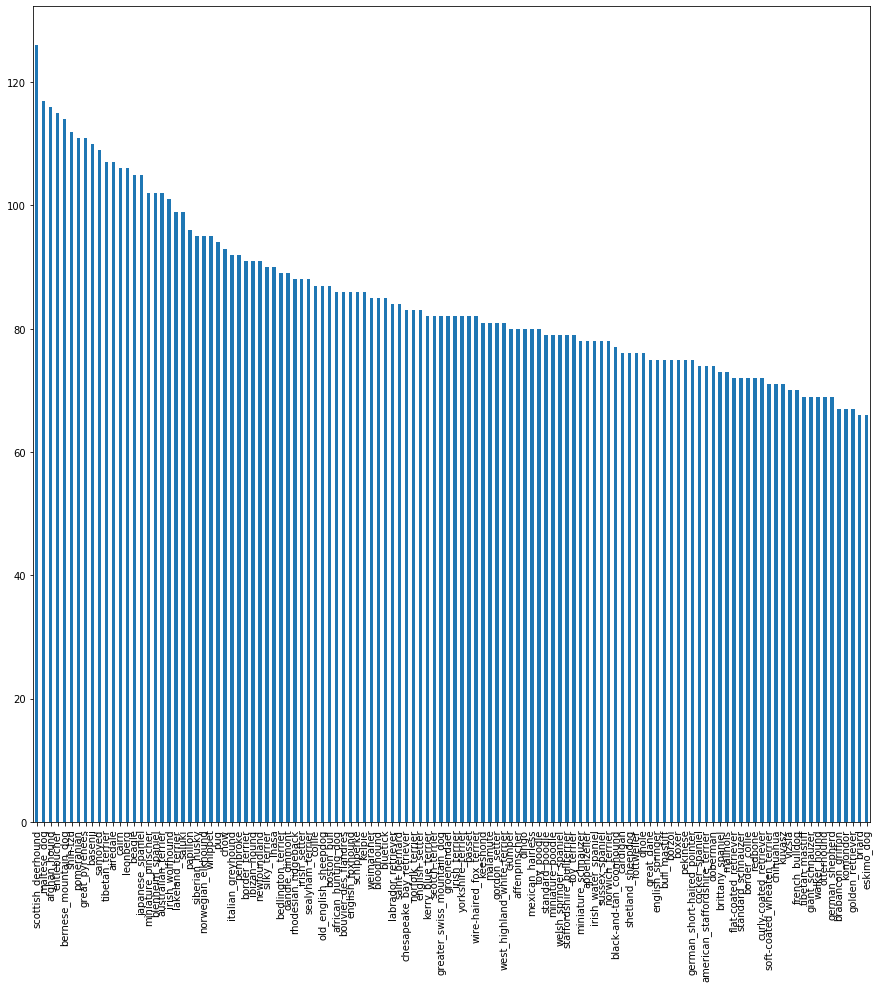

In [10]:
plt.figure(figsize=(15,15))
labels_df.breed.value_counts().plot(kind='bar')

### Get one-hot encodings of labels

In [11]:
y=labels_df['breed']
labels = LabelEncoder()
labels.fit(y)
print('Classes'+str(labels.classes_))
encodedlabels = labels.transform(y)
y = np_utils.to_categorical(encodedlabels)
classes = y.shape[1]
print(str(classes))

Classes['affenpinscher' 'afghan_hound' 'african_hunting_dog' 'airedale'
 'american_staffordshire_terrier' 'appenzeller' 'australian_terrier'
 'basenji' 'basset' 'beagle' 'bedlington_terrier' 'bernese_mountain_dog'
 'black-and-tan_coonhound' 'blenheim_spaniel' 'bloodhound' 'bluetick'
 'border_collie' 'border_terrier' 'borzoi' 'boston_bull'
 'bouvier_des_flandres' 'boxer' 'brabancon_griffon' 'briard'
 'brittany_spaniel' 'bull_mastiff' 'cairn' 'cardigan'
 'chesapeake_bay_retriever' 'chihuahua' 'chow' 'clumber' 'cocker_spaniel'
 'collie' 'curly-coated_retriever' 'dandie_dinmont' 'dhole' 'dingo'
 'doberman' 'english_foxhound' 'english_setter' 'english_springer'
 'entlebucher' 'eskimo_dog' 'flat-coated_retriever' 'french_bulldog'
 'german_shepherd' 'german_short-haired_pointer' 'giant_schnauzer'
 'golden_retriever' 'gordon_setter' 'great_dane' 'great_pyrenees'
 'greater_swiss_mountain_dog' 'groenendael' 'ibizan_hound' 'irish_setter'
 'irish_terrier' 'irish_water_spaniel' 'irish_wolfhound'
 '

In [12]:
y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [13]:
X = []
for f,img in tqdm(labels_df.values):
    train_img = cv2.imread(f'/content/train/{f}.jpg')
    train_img_resize = cv2.resize(train_img, (128,128))
    X.append(train_img_resize)
    #y.append(img)

100%|██████████| 10222/10222 [00:33<00:00, 303.90it/s]


In [0]:
X_train = np.asarray(X, dtype = np.float64)
y_train = np.asarray(y, dtype = np.float64)

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [15]:
X_train.shape

(10222, 128, 128, 3)

In [16]:
y_train.shape

(10222, 120)

In [0]:
X_train /=255

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [0]:
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X_train, y_train, random_state = 42, test_size = 0.2)

### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
sample = pd.read_csv('/content/sample_submission.csv')

In [0]:
test_img = sample['id']

In [21]:
test_img.head(2)

0    000621fb3cbb32d8935728e48679680e
1    00102ee9d8eb90812350685311fe5890
Name: id, dtype: object

Run the below code to load the test image files in x_test_feature

In [22]:
x_test_feature = []
img_rows = 128
img_cols = 128
i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread(f'/content/test/{f}.jpg')
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [00:33<00:00, 309.52it/s]


Normalize the test data and convert it into 4 dimensions

In [0]:
x_test_feature = np.asarray(x_test_feature, dtype = np.float64)
x_test_feature /= 255

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
model = tf.keras.models.Sequential()

In [25]:
model.add(tf.keras.layers.Conv2D(64, kernel_size=5, activation='relu',name='conv1',input_shape=(128,128,3)))
model.add(tf.keras.layers.Conv2D(128, kernel_size=3,name= 'conv2', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu',name= 'dense1'))
model.add(tf.keras.layers.Dense(120, activation='softmax',name= 'dense2'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 124, 124, 64)      4864      
_________________________________________________________________
conv2 (Conv2D)               (None, 122, 122, 128)     73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 61, 61, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 476288)            0         
_________________________________________________________________
dense1 (Dense)               (None, 256)               121929984 
_________________________________________________________________
dense2 (Dense)               (None, 120)               30840     
Total params: 122,039,544
Trainable params: 122,039,544
Non-trainable params: 0
__________________________________________

In [0]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adamax')

In [0]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta = 0.01, patience = 3)

### Use batch_size = 128 and epochs = 10 and execute the model

In [30]:
model.fit(X_train_data, y_train_data, validation_data=[X_test_data, y_test_data], epochs =10, batch_size=128, callbacks=[early_stopping])

Train on 8177 samples, validate on 2045 samples
Epoch 1/10
8177/8177 [==============================] - 180s 22ms/sample - loss: 5.7663 - accuracy: 0.0099 - val_loss: 4.7821 - val_accuracy: 0.0122
Epoch 2/10
8177/8177 [==============================] - 175s 21ms/sample - loss: 4.7410 - accuracy: 0.0209 - val_loss: 4.7293 - val_accuracy: 0.0152
Epoch 3/10
8177/8177 [==============================] - 176s 21ms/sample - loss: 4.5648 - accuracy: 0.0439 - val_loss: 4.6524 - val_accuracy: 0.0333
Epoch 4/10
8177/8177 [==============================] - 177s 22ms/sample - loss: 4.1228 - accuracy: 0.1185 - val_loss: 4.5958 - val_accuracy: 0.0406
Epoch 5/10
8177/8177 [==============================] - 177s 22ms/sample - loss: 3.2803 - accuracy: 0.2709 - val_loss: 4.7845 - val_accuracy: 0.0460
Epoch 6/10
8177/8177 [==============================] - 176s 21ms/sample - loss: 2.1026 - accuracy: 0.5262 - val_loss: 5.2991 - val_accuracy: 0.0479
Epoch 7/10
8177/8177 [==============================] - 17

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
train_datagen =  tf.keras.preprocessing.image.ImageDataGenerator(
      horizontal_flip=True,
      rotation_range=50,
      shear_range=0.2,
      zoom_range=0.2,
      fill_mode='nearest')

In [0]:
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      horizontal_flip=True,
      rotation_range=50,
      shear_range=0.2,
      zoom_range=0.2, 
      fill_mode='nearest')

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
train_generator = train_datagen.flow(X_train_data, y_train_data)
val_generator = val_datagen.flow(X_test_data, y_test_data)

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [37]:
model.fit(train_generator, epochs=10, validation_data=val_generator, verbose=1, callbacks=[early_stopping])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 256 steps, validate for 64 steps
Epoch 1/10
256/256 [==============================] - 210s 822ms/step - loss: 4.3144 - accuracy: 0.0642 - val_loss: 4.4281 - val_accuracy: 0.0523
Epoch 2/10
256/256 [==============================] - 208s 813ms/step - loss: 4.2336 - accuracy: 0.0770 - val_loss: 4.4378 - val_accuracy: 0.0538
Epoch 3/10
256/256 [==============================] - 206s 804ms/step - loss: 4.1746 - accuracy: 0.0777 - val_loss: 4.4222 - val_accuracy: 0.0513
Epoch 4/10
256/256 [==============================] - 209s 816ms/step - loss: 4.1047 - accuracy: 0.0887 - val_loss: 4.3461 - val_accuracy: 0.0616
Epoch 5/10
256/256 [==============================] - 206s 807ms/step - loss: 4.0410 - accuracy: 0.0967 - val_loss: 4.3512 - val_accuracy: 0.0597
Epoch 6/10
256/256 [==============================] - 208s 812ms/step - loss: 3.9983 - accuracy: 0.1092 - val_loss: 4.2935 - val_accuracy: 0.0704
Epoch 7/10
256/256 [===========

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
# Instantiate the model with the pre-trained weights (no top)
base_model= tf.keras.applications.vgg16.VGG16(weights=('/content/drive/My Drive/AIML_Project/Dog_breed/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),include_top=False, pooling='avg')

Print the summary of the base_model

In [45]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
flatten = tf.keras.layers.Flatten(name='vggFlatten')
dense1 = tf.keras.layers.Dense(1024, activation='relu', name='vggDense1')
dense2 = tf.keras.layers.Dense(256, activation='relu', name='vggDense2')
dense3 = tf.keras.layers.Dense(120, activation='softmax', name='outerLayer')

### Make all the layers in the base_model (VGG16) to be non-trainable

In [0]:
base_model.trainable = False

In [0]:
vgg_model = tf.keras.models.Sequential([
  base_model,
  flatten,
  dense1,
  dense2,
  dense3
])

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [0]:
vgg_model.compile(loss='categorical_crossentropy',optimizer='adamax',metrics=['accuracy'])

In [52]:
vgg_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
vggFlatten (Flatten)         (None, 512)               0         
_________________________________________________________________
vggDense1 (Dense)            (None, 1024)              525312    
_________________________________________________________________
vggDense2 (Dense)            (None, 256)               262400    
_________________________________________________________________
outerLayer (Dense)           (None, 120)               30840     
Total params: 15,533,240
Trainable params: 818,552
Non-trainable params: 14,714,688
_________________________________________________________________


In [54]:
vgg_model.fit(X_train_data, y_train_data ,validation_data=[X_test_data,y_test_data], epochs=10,batch_size=64, callbacks=[early_stopping])

Train on 8177 samples, validate on 2045 samples
Epoch 1/10
8177/8177 [==============================] - 113s 14ms/sample - loss: 4.7381 - accuracy: 0.0254 - val_loss: 4.6515 - val_accuracy: 0.0284
Epoch 2/10
8177/8177 [==============================] - 113s 14ms/sample - loss: 4.4616 - accuracy: 0.0662 - val_loss: 4.3547 - val_accuracy: 0.0729
Epoch 3/10
8177/8177 [==============================] - 112s 14ms/sample - loss: 4.1065 - accuracy: 0.1048 - val_loss: 4.0962 - val_accuracy: 0.0885
Epoch 4/10
8177/8177 [==============================] - 113s 14ms/sample - loss: 3.8015 - accuracy: 0.1466 - val_loss: 3.8649 - val_accuracy: 0.1252
Epoch 5/10
8177/8177 [==============================] - 111s 14ms/sample - loss: 3.5777 - accuracy: 0.1705 - val_loss: 3.7082 - val_accuracy: 0.1403
Epoch 6/10
8177/8177 [==============================] - 112s 14ms/sample - loss: 3.3866 - accuracy: 0.2074 - val_loss: 3.5848 - val_accuracy: 0.1594
Epoch 7/10
8177/8177 [==============================] - 11

There is a signoficant improvement in accuracy. Now using the augumented images in the vgg model

In [55]:
vgg_model.fit(train_generator, epochs=20, validation_data=val_generator, verbose=1, callbacks=[early_stopping])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 256 steps, validate for 64 steps
Epoch 1/20
256/256 [==============================] - 128s 499ms/step - loss: 3.4614 - accuracy: 0.1889 - val_loss: 3.6979 - val_accuracy: 0.1555
Epoch 2/20
256/256 [==============================] - 125s 487ms/step - loss: 3.3664 - accuracy: 0.2006 - val_loss: 3.6362 - val_accuracy: 0.1619
Epoch 3/20
256/256 [==============================] - 126s 494ms/step - loss: 3.3005 - accuracy: 0.2136 - val_loss: 3.5905 - val_accuracy: 0.1653
Epoch 4/20
256/256 [==============================] - 126s 491ms/step - loss: 3.2468 - accuracy: 0.2309 - val_loss: 3.5519 - val_accuracy: 0.1765
Epoch 5/20
256/256 [==============================] - 125s 490ms/step - loss: 3.2161 - accuracy: 0.2293 - val_loss: 3.5954 - val_accuracy: 0.1663
Epoch 6/20
256/256 [==============================] - 125s 488ms/step - loss: 3.1647 - accuracy: 0.2380 - val_loss: 3.5777 - val_accuracy: 0.1707
Epoch 7/20
256/256 [===========

Trying fast ai with resnet-152

In [0]:
from fastai.vision import *

In [0]:
bs = 64
sz=128
path = Path('/content')

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_csv(path, folder='train', size=sz, suffix='.jpg',fn_col=0, label_col=1, ds_tfms=get_transforms(do_flip=True), bs=bs).normalize(imagenet_stats)

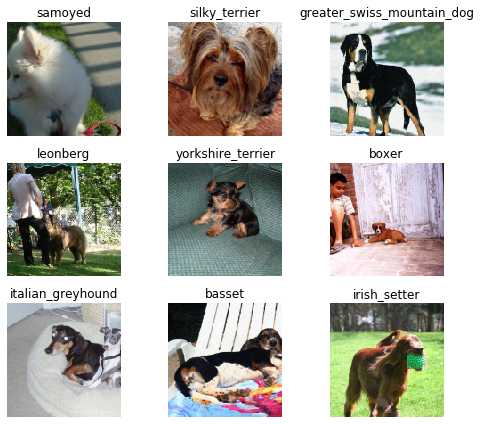

In [61]:
data.show_batch(rows=3, figsize=(7,6))

In [62]:
print(data.classes)
len(data.classes),data.c

['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale', 'american_staffordshire_terrier', 'appenzeller', 'australian_terrier', 'basenji', 'basset', 'beagle', 'bedlington_terrier', 'bernese_mountain_dog', 'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound', 'bluetick', 'border_collie', 'border_terrier', 'borzoi', 'boston_bull', 'bouvier_des_flandres', 'boxer', 'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff', 'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua', 'chow', 'clumber', 'cocker_spaniel', 'collie', 'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo', 'doberman', 'english_foxhound', 'english_setter', 'english_springer', 'entlebucher', 'eskimo_dog', 'flat-coated_retriever', 'french_bulldog', 'german_shepherd', 'german_short-haired_pointer', 'giant_schnauzer', 'golden_retriever', 'gordon_setter', 'great_dane', 'great_pyrenees', 'greater_swiss_mountain_dog', 'groenendael', 'ibizan_hound', 'irish_setter', 'irish_terrier', 'iris

(120, 120)

In [63]:
learn = cnn_learner(data, models.resnet152, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/checkpoints/resnet152-b121ed2d.pth


In [64]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [65]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,2.552927,1.230965,0.673679,10:25
1,1.506714,0.945845,0.717221,09:37
2,1.113229,0.868168,0.740704,09:32
3,0.818553,0.827876,0.759296,09:20


Pretty good accuracy,now trying to train the layers 

In [66]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


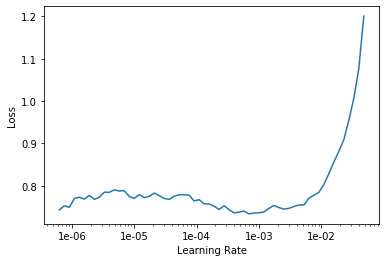

In [67]:
learn.recorder.plot()

In [68]:
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.839664,0.926042,0.729452,13:48
1,1.322633,1.701444,0.550391,13:50
2,1.701509,1.998564,0.516145,13:52
3,1.539282,1.666765,0.554795,13:43
4,1.232182,1.583011,0.572407,13:53
5,0.912842,1.398829,0.632583,13:52
6,0.635822,1.334145,0.643346,13:55
7,0.402198,1.207311,0.681507,14:06
8,0.257246,1.127390,0.699119,13:55
9,0.189136,1.115340,0.705479,13:56


Training Resnet152 gives us good results but takes a long time to train the data